In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as BS
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from pylab import rc, rcParams
import seaborn as sns
from matplotlib.pyplot import figure

pd.options.display.max_rows = 1500
pd.options.display.max_columns = 1500

%matplotlib inline

In [2]:
# create a Request object for the wikipedia page for the Turing Award
response = requests.get('https://en.wikipedia.org/wiki/List_of_disasters_by_cost')

# read the resulting HTML into a variable called result_text
result_text = response.text

In [3]:
print(type(response))
print(type(result_text))

<class 'requests.models.Response'>
<class 'str'>


In [4]:
earthquake_US = BS(result_text, 'lxml')

In [10]:
data = []
table = earthquake_US.find('table', class_ ="wikitable sortable")
table_body = table.find('tbody')

rows = table_body.find_all('tr')[2:]
for row in rows:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)   

In [11]:
Earthquakes_US = pd.DataFrame(data)

cost = Earthquakes_US.rename(columns = {0:'Cost in Billions',1:'cost 2017 to 2018',2: 'Fatalities', 4: 'Type', 5: 'Year', 6: 'Nation'})
cost.head()

,Cost in Billions,cost 2017 to 2018,Fatalities,3,Type,Year,Nation
0,$360[3],$411.3,15894,2011 Tōhoku earthquake and tsunami,"Earthquake, Tsunami",2011,Japan
1,$197[4],$329.8,5502 – 6434,Great Hanshin earthquake,Earthquake,1995,Japan
2,$148[5],$176.4,87587,2008 Sichuan earthquake,Earthquake,2008,China
3,$125[6],$164.9,1245 – 1836,Hurricane Katrina,Tropical cyclone,2005,United States
4,$125[6],$129.5,107,Hurricane Harvey,Tropical cyclone,2017,United States


In [24]:
cost['Cost in Billions'] = cost['Cost in Billions'].replace('\[.+', '', regex = True)
cost['Cost in Billions'] = cost['Cost in Billions'].str.replace("$", "",regex = True)
cost['Cost in Billions'] = cost['Cost in Billions'].str.replace("≥", "",regex = True)
cost['Cost in Billions'] = cost['Cost in Billions'].str.replace(">", "",regex = True)
#cost['Cost in Billions'] = cost['Cost in Billions'].str.replace(" - ", " ")
cost['cost 2017 to 2018'] = cost['cost 2017 to 2018'].str.replace("$", "",regex = True)
cost['cost 2017 to 2018'] = cost['cost 2017 to 2018'].str.replace("≥", "",regex = True)
cost['cost 2017 to 2018'] = cost['cost 2017 to 2018'].str.replace(">", "",regex = True)
cost['Fatalities'] = cost['Fatalities'].replace('\[.+', '', regex = True)
cost['Nation'] = cost['Nation'].str.replace('\s+\(.+', '')
cost['Fatalities']= cost['Fatalities'].str.replace('\+', '')
cost['cost 2017 to 2018']=cost['cost 2017 to 2018'].str.replace('~','')
cost['Type']= cost['Type'].str.capitalize()

In [25]:
cost['Cost in Billions'] = cost['Cost in Billions'].str.replace("\s",'',regex = True)
cost['cost 2017 to 2018'] = cost['cost 2017 to 2018'].str.replace("\s",'',regex = True)
cost['Fatalities'] = cost['Fatalities'].str.replace("\s",'',regex = True)


In [26]:
cost.head(100)

,Cost in Billions,cost 2017 to 2018,Fatalities,3,Type,Year,Nation
0,360,411.3,15894,2011 Tōhoku earthquake and tsunami,"Earthquake, tsunami",2011,Japan
1,197,329.8,5502–6434,Great Hanshin earthquake,Earthquake,1995,Japan
2,148,176.4,87587,2008 Sichuan earthquake,Earthquake,2008,China
3,125,164.9,1245–1836,Hurricane Katrina,Tropical cyclone,2005,United States
4,125,129.5,107,Hurricane Harvey,Tropical cyclone,2017,United States
5,91.6,94.9,3057–8498,Hurricane Maria,Tropical cyclone,2017,North America
6,68.7,76.3,233,Hurricane Sandy,Tropical cyclone,2012,North America
7,64.8,66.5,134,Hurricane Irma,Tropical cyclone,2017,North America
8,60–100,69.7–116.1,11,Deepwater Horizon oil spill,Contamination (oil),2010,United States
9,53.25,115.8,4800–17000,1988–89 North American drought,Drought,1988,"United States, Canada"


In [27]:
def cost_split(i):
    
    
    average = 0
    splt = i.split('–')
    if len(splt)==2:
        first = float(splt[0])
        second = float(splt[1])
        average = (first+second)/2
    else:
        average = float(splt[0])
   
    return average

In [28]:
cost['Cost in Billions 1'] = cost['Cost in Billions'].apply(cost_split)
#cost['Fatalities 1'] = cost['Fatalities'].apply(cost_split)
cost['cost 2017 to 2018 1']= cost['cost 2017 to 2018'].apply(cost_split)

In [29]:
cost.head()

,Cost in Billions,cost 2017 to 2018,Fatalities,3,Type,Year,Nation,Cost in Billions 1,cost 2017 to 2018 1
0,360,411.3,15894,2011 Tōhoku earthquake and tsunami,"Earthquake, tsunami",2011,Japan,360.0,411.3
1,197,329.8,5502–6434,Great Hanshin earthquake,Earthquake,1995,Japan,197.0,329.8
2,148,176.4,87587,2008 Sichuan earthquake,Earthquake,2008,China,148.0,176.4
3,125,164.9,1245–1836,Hurricane Katrina,Tropical cyclone,2005,United States,125.0,164.9
4,125,129.5,107,Hurricane Harvey,Tropical cyclone,2017,United States,125.0,129.5


In [30]:

#cost['Cost in Billions 1'] = cost['Cost in Billions 1'].astype(int)
#cost

In [31]:
cost.shape

(91, 9)

In [32]:
cost1 = cost[['Year', 'Type','Cost in Billions 1','Nation','Fatalities']]
cost1.head()

,Year,Type,Cost in Billions 1,Nation,Fatalities
0,2011,"Earthquake, tsunami",360.0,Japan,15894
1,1995,Earthquake,197.0,Japan,5502–6434
2,2008,Earthquake,148.0,China,87587
3,2005,Tropical cyclone,125.0,United States,1245–1836
4,2017,Tropical cyclone,125.0,United States,107


In [33]:
#cost1.set_index('Nation', drop = False, inplace = True)

In [34]:
cost2 =cost1.groupby('Type')['Cost in Billions 1'].sum()

In [35]:
cost2 =cost2.sort_values(ascending= True)

In [36]:

cost2['Earthquake_total']= cost2['Earthquake'] + cost2['Earthquake, tsunami']

cost2.drop(['Earthquake','Earthquake, tsunami'], inplace = True)
cost2.head(100)

Type
Volcano                        1.70
Maritime disaster              2.00
Drought, wildfire              2.50
Explosion                      2.68
Severe storm                   2.90
Space flight accident          3.20
Hailstorm                      5.75
Tornado                       15.10
Wildfire                      21.22
European windstorm            64.20
Contamination (oil)           87.00
Terror attack                 91.10
Flood                        110.90
Drought                      116.10
Contamination (radiation)    242.60
Tropical cyclone             836.09
Earthquake_total             890.35
Name: Cost in Billions 1, dtype: float64

In [37]:
# df = pd.DataFrame(cost2).reset_index()
# df.columns = ['Type','Billions']
# #df.sort_values(ascending = False, by = 'Billions')
# df.set_index('Type', inplace=True)
# df.sort_values(by = 'Billions', ascending = False)

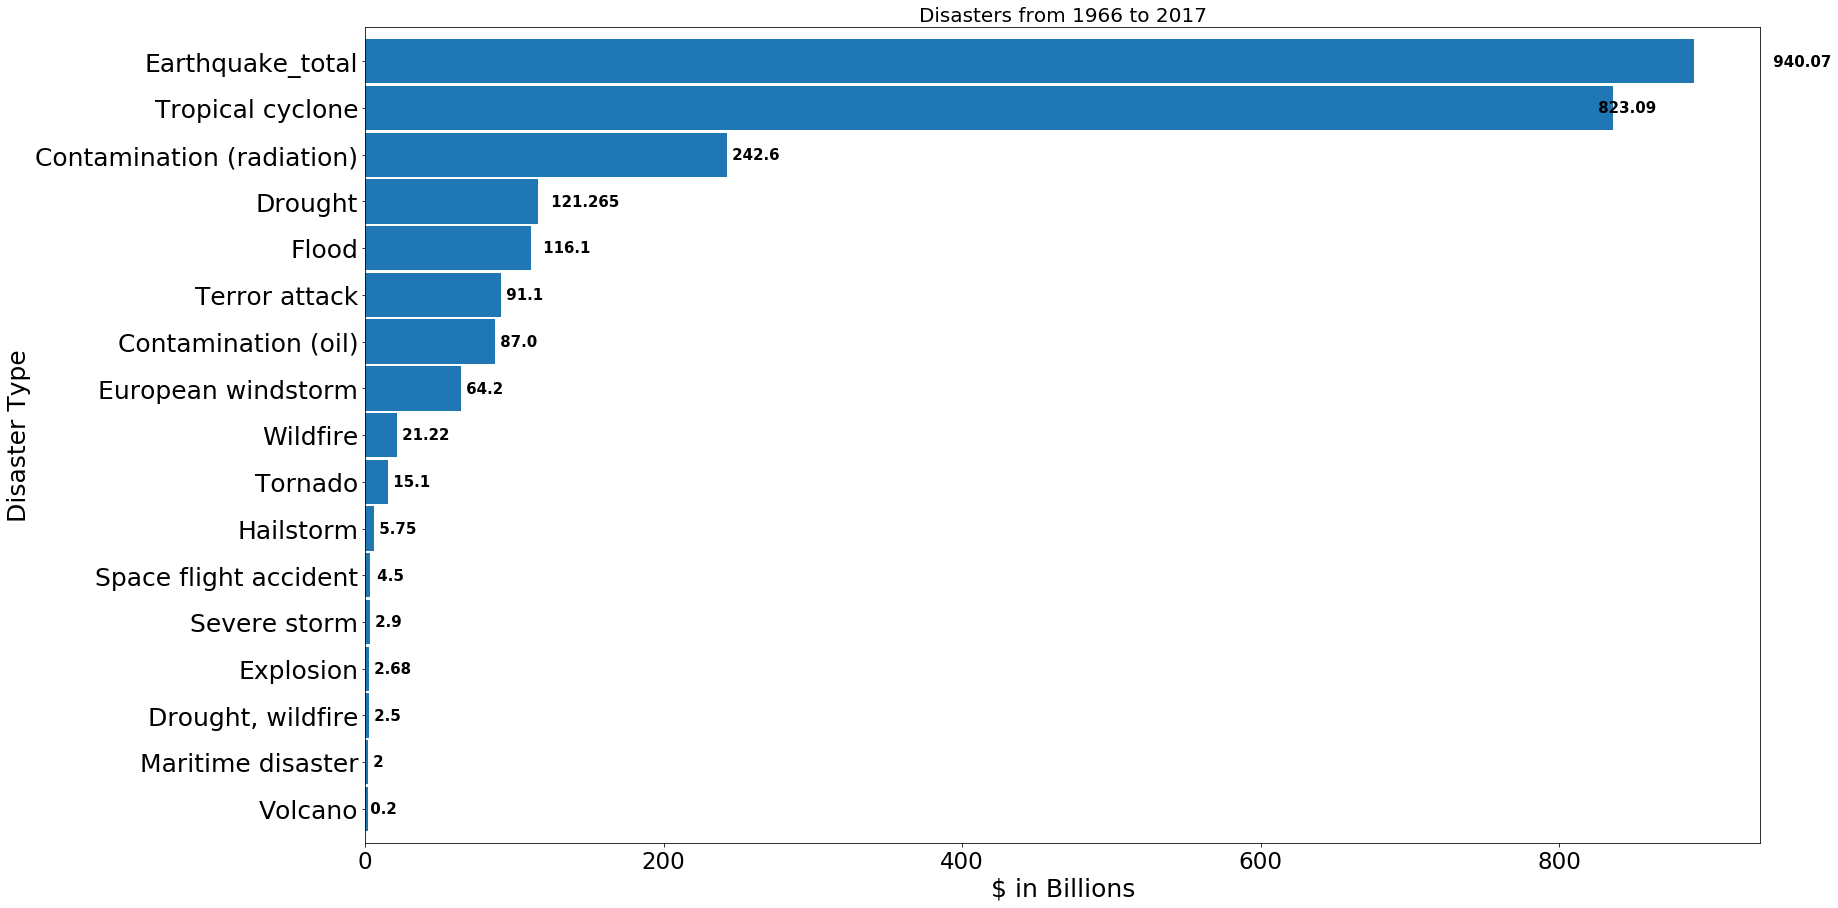

In [38]:
plt.figure(figsize=(25,15))
cost2.plot.barh(width = 0.95)
Y = [0.2, 2, 2.5, 2.680,2.900,4.500,5.750,15.100,21.220,64.200,87.000,91.100,116.100,121.265,242.600,823.090,940.070]
plt.title("Disasters from 1966 to 2017", size = 20)
plt.ylabel('Disaster Type', fontsize=25)
plt.xlabel('$ in Billions', fontsize=25)
plt.xticks(size =23)
plt.yticks(size =25);

for i, value in enumerate(Y):
    plt.text(value, i, " "+str(value), color='black', va='center', fontweight='bold', fontsize = 15)
plt.savefig('billions3.pdf')

In [39]:
#cost3 =cost1.groupby('Type')[['Nation']].sum()
cost3 = cost1[(cost1['Type'] == "Earthquake, tsunami")] #& (cost1['Type'] == "Earthquake")
cost4 = cost1[(cost1['Type'] == "Earthquake")]

cost5 = cost3.merge(cost4, how = 'outer')
cost5=cost5.groupby(['Nation','Cost in Billions 1','Fatalities']).sum().reset_index().sort_values(ascending=False, by ='Cost in Billions 1')

In [40]:
# for dataframe plt.rcParams['figure.figsize'] = 15, 10 work for chaning figure size


In [41]:
cost5=cost5.rename(columns={'Nation':'Country','Cost in Billions 1':'Cost in Billions','Fatalities':'Fatalities','Year':'Year','Type':'Disaster'})

In [42]:

cost5.head(100)



,Country,Cost in Billions,Fatalities,Year,Disaster
6,Japan,360.00,15894,2011,"Earthquake, tsunami"
5,Japan,197.00,5502–6434,1995,Earthquake
0,China,148.00,87587,2008,Earthquake
12,United States,49.00,57,1994,Earthquake
9,New Zealand,40.00,185,2011,Earthquake
4,Japan,28.00,68,2004,Earthquake
3,Italy,15.80,27,2012,Earthquake
11,Turkey,15.25,17118–17127,1999,Earthquake
10,Southeast Asia,15.00,230000–280000,2004,"Earthquake, tsunami"
1,Haiti,8.10,100000–220000,2010,Earthquake


In [43]:
cost5.head()
cost6 = cost5.groupby('Country')['Cost in Billions'].sum().sort_values(ascending = True)



In [44]:
cost6.head(20)

Country
Iran Iraq           6.20
Mexico              8.00
Haiti               8.10
Southeast Asia     15.00
Turkey             15.25
Italy              15.80
New Zealand        40.00
United States      49.00
China             148.00
Japan             585.00
Name: Cost in Billions, dtype: float64

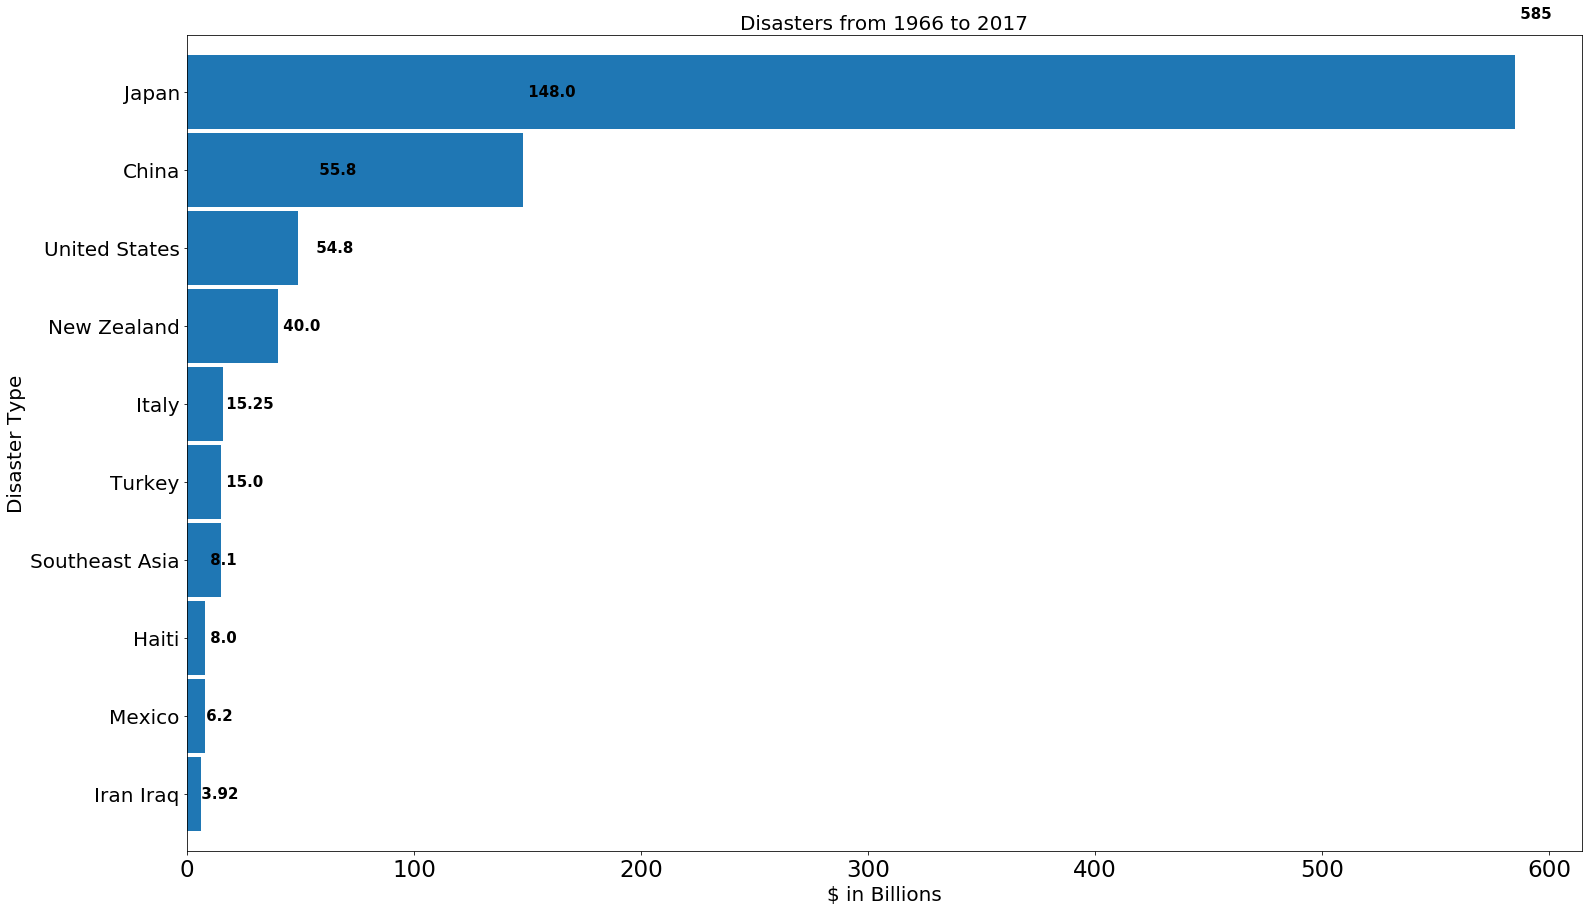

In [45]:
plt.figure(figsize=(25,15))
cost6.plot.barh(width = 0.95)
Y = [3.92,6.20,8.0,8.10,15.0,15.25,40.0,54.80,55.80,148.0,585]
plt.title("Disasters from 1966 to 2017", size = 20)
plt.ylabel('Disaster Type', fontsize=20)
plt.xlabel('$ in Billions', fontsize=20)
plt.xticks(size =23)
plt.yticks(size =20);

for i, value in enumerate(Y):
    plt.text(value, i, " "+str(value), color='black', va='center', fontweight='bold', fontsize = 15)
plt.savefig('countriesbillions.pdf')

In [46]:
cost7.head()

NameError: name 'cost7' is not defined

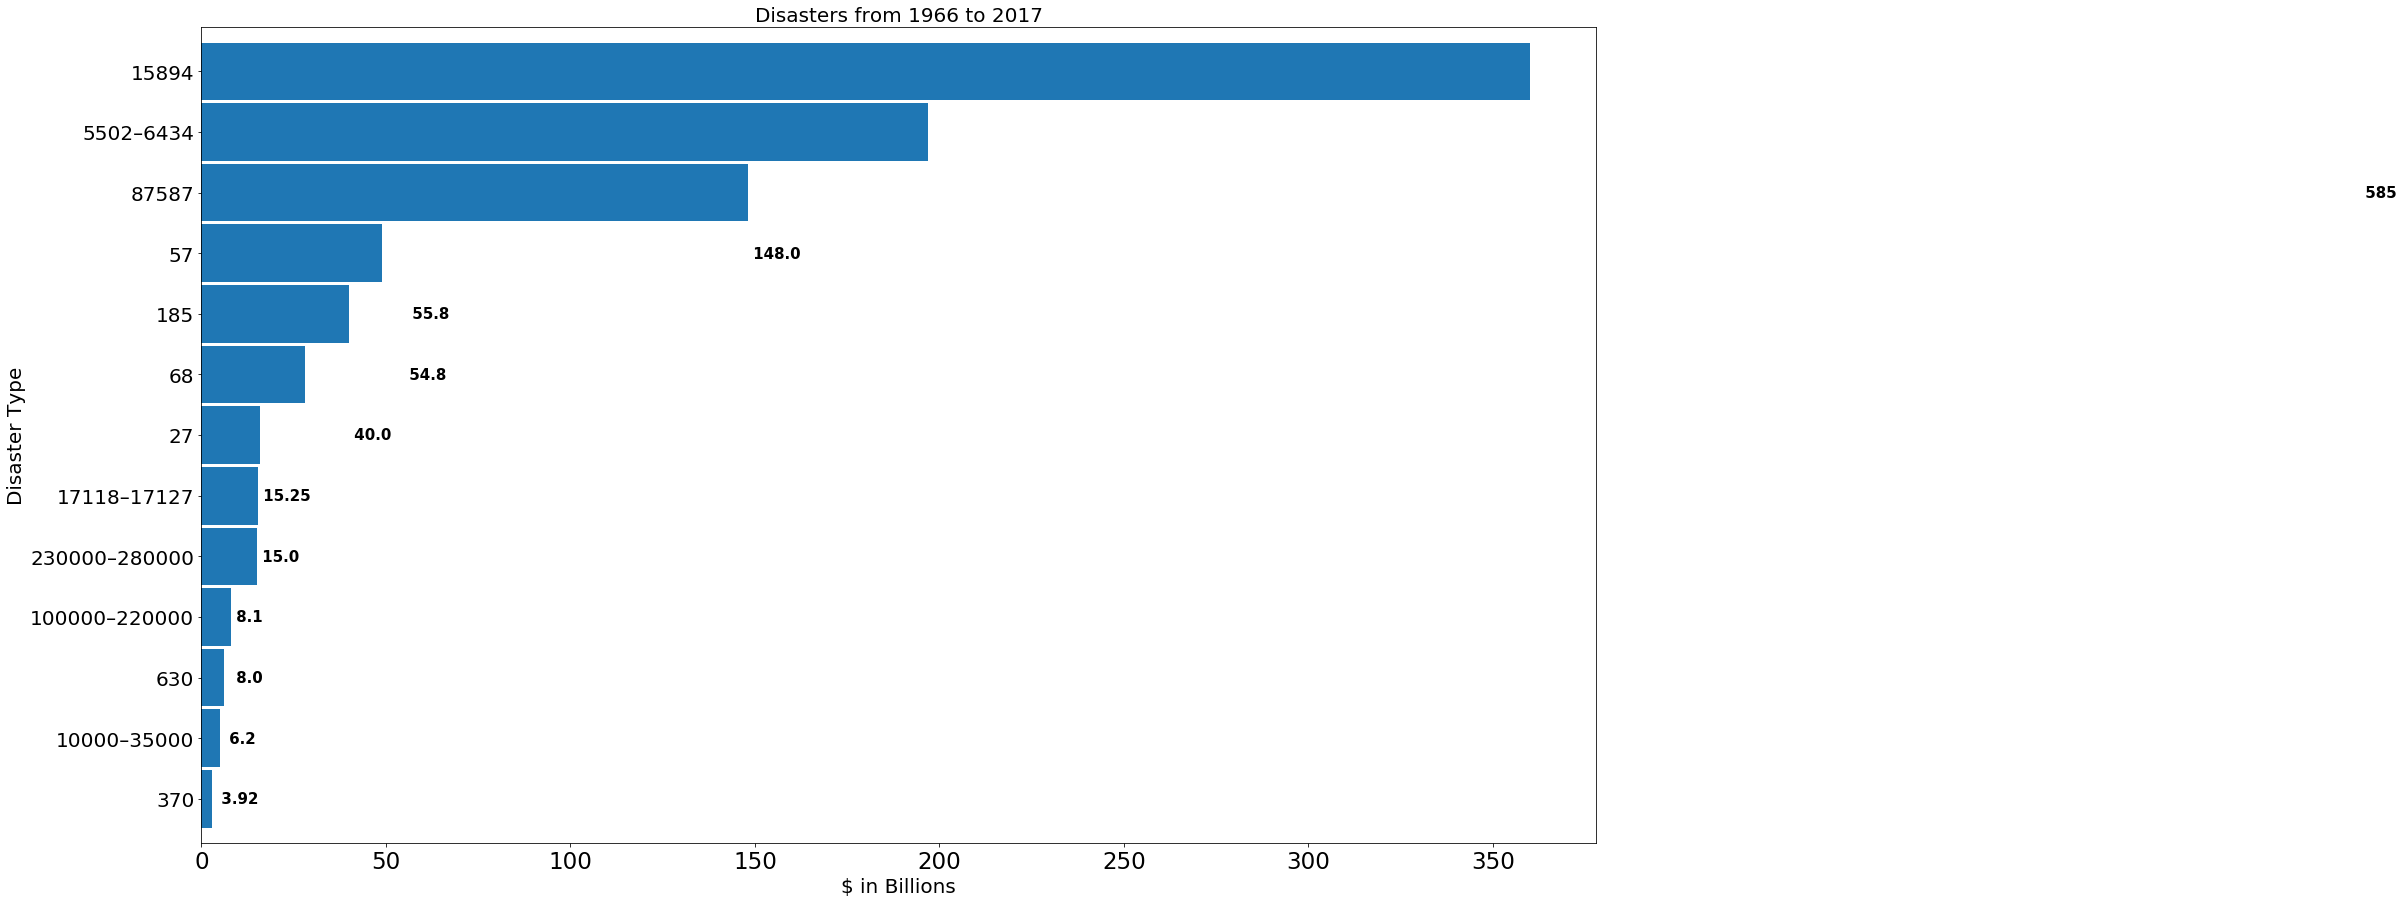

In [47]:

cost7 = cost5.groupby('Fatalities')['Cost in Billions'].sum().sort_values(ascending = True)
plt.figure(figsize=(25,15))
cost7.plot.barh(width = 0.95)
Y = [3.92,6.20,8.0,8.10,15.0,15.25,40.0,54.80,55.80,148.0,585]
plt.title("Disasters from 1966 to 2017", size = 20)
plt.ylabel('Disaster Type', fontsize=20)
plt.xlabel('$ in Billions', fontsize=20)
plt.xticks(size =23)
plt.yticks(size =20);


for i, value in enumerate(Y):
    plt.text(value, i, " "+str(value), color='black', va='center', fontweight='bold', fontsize = 15)

(0, 400)

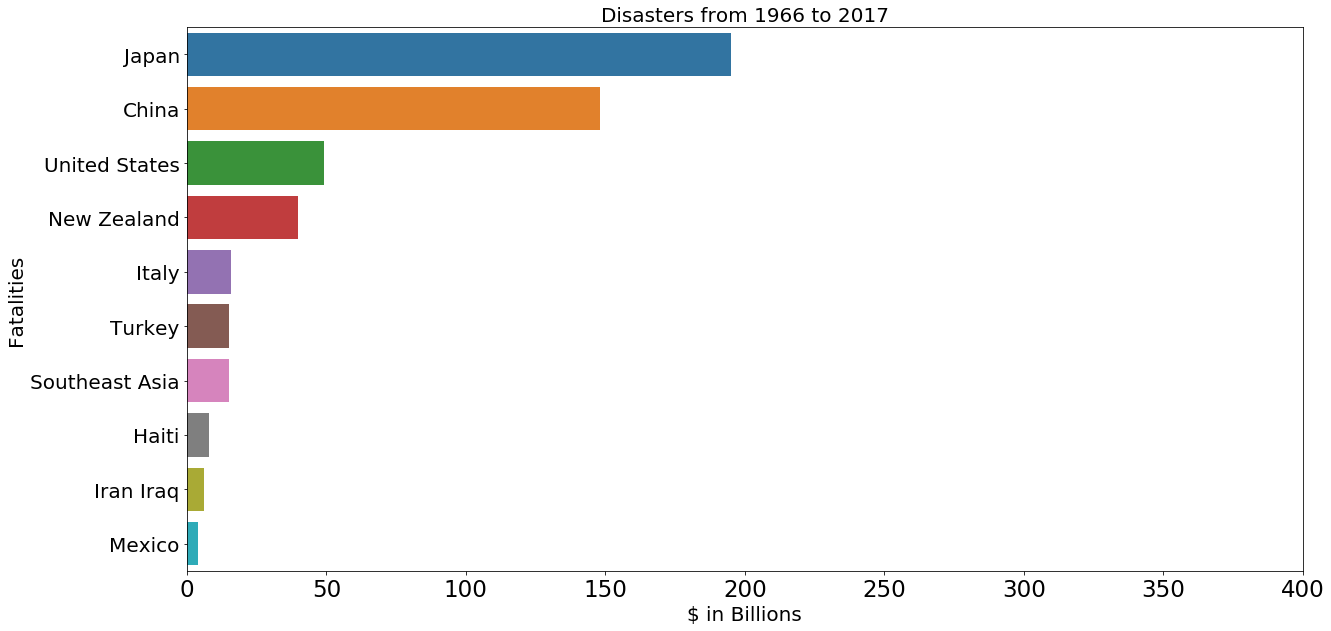

In [48]:
plt.figure(figsize=(20,10))
sns.barplot(y='Country', x= 'Cost in Billions',data=cost5, ci=None)
plt.title("Disasters from 1966 to 2017", size = 20)
plt.ylabel('Fatalities', fontsize=20)
plt.xlabel('$ in Billions', fontsize=20)
plt.xticks(size =23)
plt.yticks(size =20);
plt.xlim(0, 400)
